### Multi-layer Perceptron Exercise
#### In this exercise, we will implement the multi-perceptron algorithm with two hidden layers. 
#### The implementation of the MLP algorithm will be in the mlp.py file but you will test your implementation 
#### in this notebook. In this exercise we will use the MNIST dataset that we used for week 2 lab (KNN). 

In [132]:
# importing the MLP algorithm from mlp.py file 
# where you will implement the MLP algorithm 
from mlp import MLP 
import numpy as np

# This is to reload all changed modules every time before executing a new line.
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
# loading the MNIST datatset
import pickle, gzip

f = gzip.open('mnist.pkl.gz','rb')
tset, vset, teset = pickle.load(f, encoding='latin1')
print(tset[0].shape, vset[0].shape, teset[0].shape)
f.close()

(50000, 784) (10000, 784) (10000, 784)


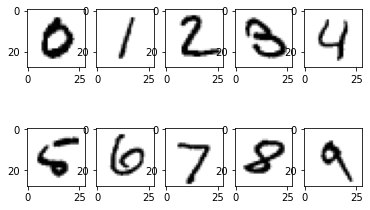

In [134]:
import matplotlib.pyplot as plt # To install: pip install matplotlib

# visualise some examples from the dataset 
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(teset[1] == i)[0]
    plottable_image = np.reshape(teset[0][im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

In [135]:
# we will use only 9000 images for training and 1000 for testing 

# Just use the first 9000 images for training 
tread = 9000
train_in = tset[0][:tread,:]

# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((tread,10))
for i in range(tread):
    train_tgt[i,tset[1][i]] = 1

# and use 1000 images for testing
teread = 1000
test_in = teset[0][:teread,:]
test_tgt = np.zeros((teread,10))
for i in range(teread):
    test_tgt[i,teset[1][i]] = 1

#### Initialise the MLP classifier 

In [136]:
# We choose the first and second hidden layers to have 5 neurons each.
sizes = [784,5,5,10] # 784 is the number of pixels of the images and 10 is the number of classes 
classifier = MLP(sizes)

In [137]:
# TODO: open the mlp.py file and implement self.forwardPass and self.train methods
# test your implementation here 
# for now, let's keep the learning rate and the number of iterations unchanged  
classifier.train(train_in, train_tgt, 0.0001, 1000)

Iteration:  0  Error:  4135.14717450264
Iteration:  1  Error:  4092.5223103918424
Iteration:  2  Error:  4067.4161290525844
Iteration:  3  Error:  4058.897530864903
Iteration:  4  Error:  4060.564090999683
Iteration:  5  Error:  4068.9917660091987
Iteration:  6  Error:  4080.0054590296377
Iteration:  7  Error:  4085.1211842389152
Iteration:  8  Error:  4077.1749843131424
Iteration:  9  Error:  4059.5541865144646
Iteration:  10  Error:  4041.303220983921
Iteration:  11  Error:  4030.4439827753213
Iteration:  12  Error:  4025.332618771995
Iteration:  13  Error:  4016.4993305149624
Iteration:  14  Error:  4003.450150746472
Iteration:  15  Error:  3978.759368238701
Iteration:  16  Error:  3937.7890381960538
Iteration:  17  Error:  3902.5032838301345
Iteration:  18  Error:  3860.9613515093693
Iteration:  19  Error:  3824.3581846370275
Iteration:  20  Error:  3785.257517416212
Iteration:  21  Error:  3726.991957392006
Iteration:  22  Error:  3701.6719037083653
Iteration:  23  Error:  3644.43

In [138]:
# we evaluate our model on the testing set 
# and show the confusion matrix and the accuracy
classifier.evaluate(test_in, test_tgt)

The confusion matrix is:
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  6. 126. 105. 100.   5.  75.   4.   9.  74.   5.]
 [  3.   0.   4.   1.   4.   1.   1.   4.   2.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   0.   1.   2.   1.   1.   2.   1.   1.   1.]
 [ 75.   0.   6.   4. 100.  10.  80.  85.  12.  85.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
The accuracy is  21.7


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  6., 126., 105., 100.,   5.,  75.,   4.,   9.,  74.,   5.],
       [  3.,   0.,   4.,   1.,   4.,   1.,   1.,   4.,   2.,   3.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   0.,   1.,   2.,   1.,   1.,   2.,   1.,   1.,   1.],
       [ 75.,   0.,   6.,   4., 100.,  10.,  80.,  85.,  12.,  85.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [139]:
# you should expect the accuracy to be really low ~ most likely less than %50
# I think we can do better by experimenting with different learning rate and 
# number of neurons in each hidden layer. 

In [140]:
# TODO: modify the network parameters to get the test accuracy above %90 
# you can change the learning rate, the number of neurons of each hidden layer
# and number of iterations. You can also implement the gradient descent algorithm
# with momentum and experiment it with different momentum values. 

In [141]:
best_sizes = None
best_beta = None
best_momentum = None
best_lr = None # best learning rate
best_niterations = None
best_classifier = MLP(sizes = best_sizes, beta=best_beta, momentum=best_momentum)
best_classifier.train(train_in, train_tgt, best_lr, best_niterations)
best_classifier.evaluate(test_in, test_tgt)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# TODO: run the following code to save the best parameters and 
# the weights of the network that achieves the desired accuracy
best_parameters = {
    'sizes': best_sizes,
    'beta': best_beta,
    'momentum': best_momentum,
    'lr': best_lr,
    'niterations': best_niterations,
    'weights_1': best_classifier.weights1,
    'weights_2': best_classifier.weights2,
    'weights_3': best_classifier.weights3,
}

with open('best_classifier.pkl', 'wb') as handle:
    pickle.dump(best_parameters, handle, protocol=pickle.HIGHEST_PROTOCOL)